<a href="https://colab.research.google.com/github/christinapitsillidou/AML-2019-Group19/blob/master/gd_group19_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient descent in 2 dimensions

###Contents
- Set up environment (directory, packages, classes)
- Six-Hump Camel function to get minimized
- Plain Vanilla
- Momentum
- ADAM
- Compare GD methods
- (RMSprop)

###Notes

The class which contains the gradient descent functions is stored as a separate module (gd.py).

## Set up environment

### Set up directory

Press link to URL and allow access to Google drive

In [1]:
#Mount google drive to make it accessible to colab
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Change directory to the location of the files

In [2]:
#Change working directory to PCode and check
%cd /content/gdrive/My Drive/AML/Projects/Coursework1/PCode

/content/gdrive/My Drive/AML/Projects/Coursework1/PCode


### Import module gd and class gd_group19_2d

In [0]:
import gd
from gd import gd_group19_2d

### Import packages


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

font = {'size': 18}
matplotlib.rc('font', **font)

# Six-Hump Camel function to get minimized

The Six-Hump Camel function was selected to get minimized. It can be found in http://www.sfu.ca/~ssurjano/camel6.html. It is a 2 dimensional function given by:

$$f(\bar{x}) = (4 - 2.1x_1^2 + x_1^4/3)x_1^2 + x_1x_2 + (-4 + 4x_2^2)x_2^2$$

It has six local minima, two of which are global. The global minima can be found at $x^*$ = (0.0898,-0.7126)
 and (-0.0898,0.7126) and evaluate as $f(x^*) = -1.0316$



##Define function

The function and its two partial derivatives (w.r.t. $x_1$ and $x_2$) are defined below:

In [0]:
def fn_loss(x1,x2):
    return (4 - 2.1*x1**2 + (x1**4)/3)*x1**2 + x1*x2 + (-4 + 4*x2**2)*x2**2

def fn_grad_x1(x1,x2):    # partial derivative wrt x1
    return 8*x1 - 8.4*x1**3 + 2*x1**5 + x2

def fn_grad_x2(x1,x2):  # partial derivative wrt x2
    return x1 - 8*x2 + 16*x2**3

Initializing the 'solver' using the gd_group19_2d class and the functions defined above.

In [0]:
solver = gd_group19_2d(fn_loss = fn_loss, fn_grad_x1 = fn_grad_x1 , fn_grad_x2 = fn_grad_x2)

## Visualize function

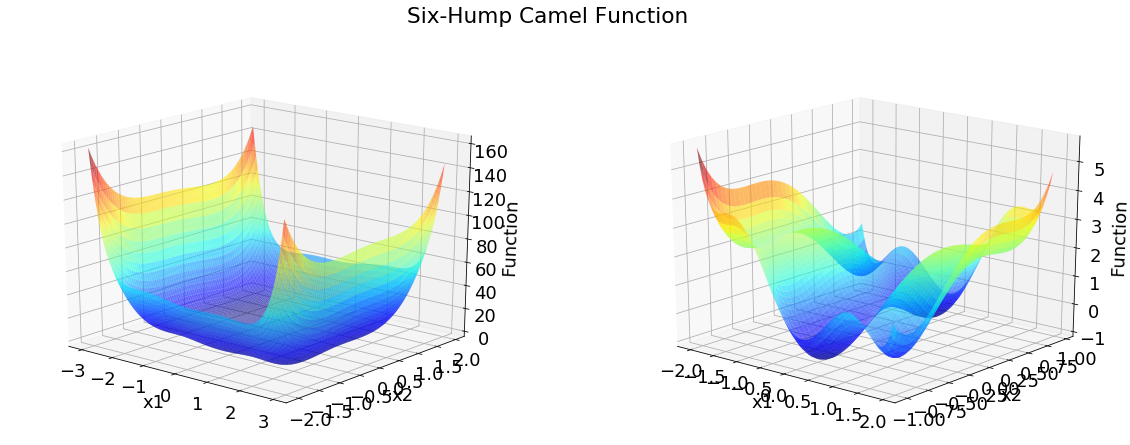

In [7]:
fig = plt.figure(figsize=(20,7))
plt.suptitle('Six-Hump Camel Function')

# First subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d',  elev=20, azim=-50)
x1 = np.arange(-3, 3, 0.05)
x2 = np.arange(-2, 2, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax1.plot_surface(x1, x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.6, linewidth=0)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Function')

# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d',  elev=20, azim=-50)
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax2.plot_surface(x1, x2, z, cmap=plt.cm.jet, rstride=1, cstride=1, alpha=0.6, linewidth=0)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('Function')

plt.show()

#Plain Vanilla
Use function *find_min()* from class to minimize the loss function using Plain Vanilla, e.g. with initial points x1_init = x2_init = 1, n_iter = 10,000, eta = 0.01 and tol = 1e-5. Please note that the 2 global minima are found at +-(-0.0898,0.7126).

In [313]:
x1_init = 1
x2_init = 1
n_iter = 10000
eta = 0.01
tol = 1e-5
solver.find_min(x1_init, x2_init, n_iter, eta, tol)

Converged in 181 steps.  Loss fn -1.031628453485 achieved by (x1,x2) = (-0.0898409,0.7126563)


## Loss path
Loss path followed is plotted on top of Six-Hump Camel function contour. Starting point is yellow and as iterations progress, points get darker.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


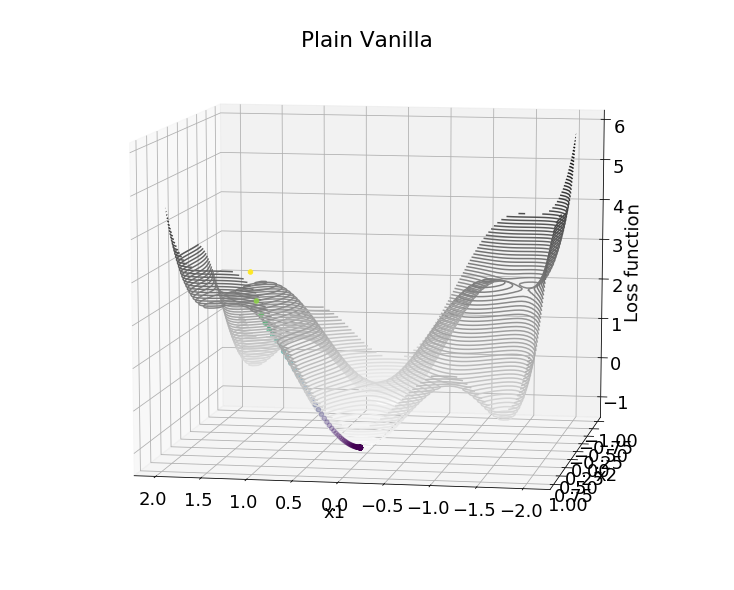

In [314]:
cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax.contour3D(x1, x2, z, 100, cmap='binary')
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Loss function')
ax.set_title('Plain Vanilla')
ax.view_init(10,100)

## Number of iterations against Step size
Number of iterations needed until convergence are plotted against the Step size, eta.

In [0]:
toler = 1e-5
step_size = []
number_of_step = []

for j in range(1,500):
    r = j/2000
    solver.find_min(x1_init, x2_init, n_iter, eta = r, tol = toler);
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    number_of_step.append(solver.num_steps)

Text(0.5, 1.0, 'Plain Vanilla')

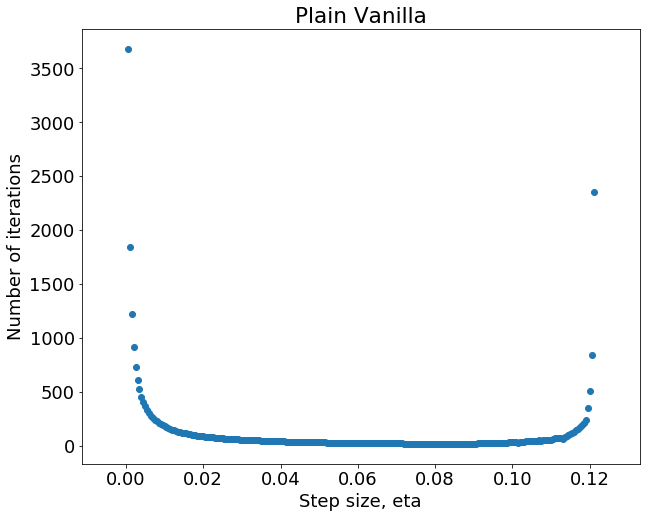

In [202]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("Plain Vanilla")

Figure above shows that Plain Vanilla does not find solution when step size, eta, is smaller or equal to 0 or greater or equal than 0.12.

##Time against Step size
Use **time** class to record time taken for gradient descent method to find solution. Please note that the time recorded also depends on computer and other processes taking place and thus might be biased.

In [0]:
import time

run_time = []
step_size = [] 

for j in range(1,500):
    r = j/2000
    time_taken = 0
    start_time = time.clock()
    solver.find_min(x1_init, x2_init, n_iter, eta = r, tol = toler)
    time_taken = time.clock() - start_time
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    run_time.append(time_taken)    

Text(0.5, 1.0, 'Plain Vanilla')

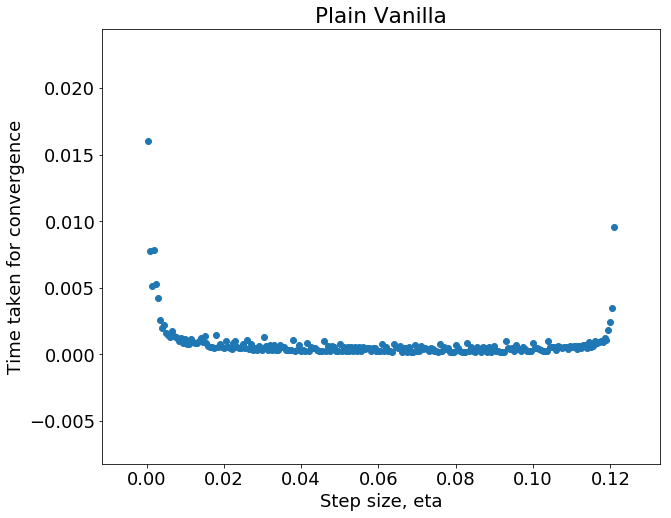

In [206]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')
ax1.set_title('Plain Vanilla')

Shape looks similar to Number of iterations against Step size plot as expected.

##Loss path for different Step sizes
In order to show the relative speed of convergence, the following plot was constructed by trying out different step sizes. Step sizes (eta) values of (0.00001, 0.0001, 0.001, 0.01, 0.1) were considered.

Did not converge
Did not converge
Converged in 1839 steps.  Loss fn -1.031628453483 achieved by (x1,x2) = (-0.0898407,0.7126563)
Converged in 181 steps.  Loss fn -1.031628453485 achieved by (x1,x2) = (-0.0898409,0.7126563)
Converged in 34 steps.  Loss fn -1.031628453489 achieved by (x1,x2) = (-0.089842,0.7126568)


Text(0, 0.5, 'Loss path')

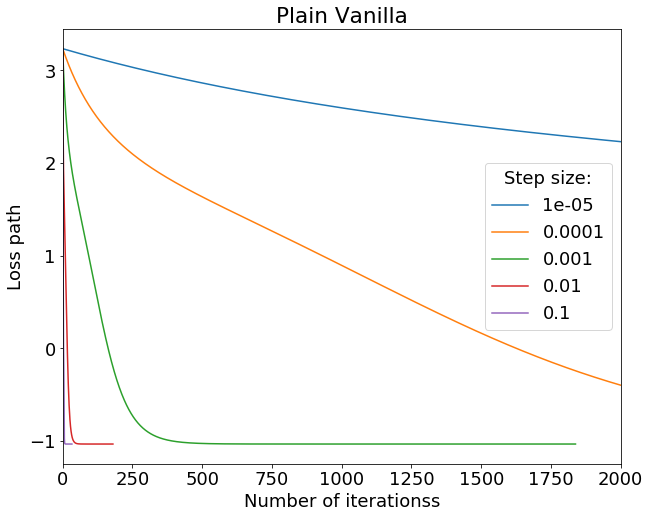

In [208]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]
for r in eta :
    solver.find_min(x1_init, x2_init, n_iter, eta = r, tol = toler)
    x_range = range(len(solver.loss_path))
    ax1.plot(x_range, solver.loss_path)      
plt.xlim((0,2000))
plt.title("Plain Vanilla")
ax1.legend(eta,title="Step size:")
ax1.set_xlabel('Number of iterationss')
ax1.set_ylabel('Loss path')

It can be seen that when using a very small step size, the convergence can take a very long time.

# Momentum
Use function *momentum()* from class to minimize the loss function using Momentum, e.g. with initial points x1_init = x2_init = 1, n_iter = 10,000, eta = 0.01, tol = 1e-5 and alpha = 0.90. Please note that the 2 global minima are found at +-(-0.0898,0.7126).

In [212]:
eta = 0.01
toler = 1e-5
alpha = 0.90
solver.momentum(x1_init, x2_init, n_iter, eta, tol, alpha) 

Converged in 237 steps.  Loss fn -1.031628453485 achieved by (x1,x2) = (-0.0898429,0.7126569)


##Loss path
Loss path followed is plotted on top of Six-Hump Camel function contour. Starting point is yellow and as iterations progress, points get darker.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


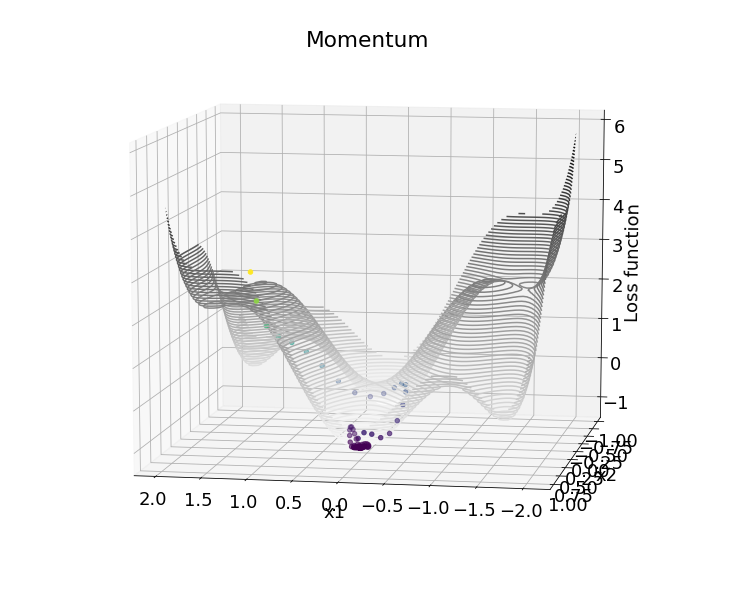

In [213]:
cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax.contour3D(x1, x2, z, 100, cmap='binary')
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Loss function')
ax.set_title('Momentum')
ax.view_init(10,100)

## Number of iterations against Step size

In [0]:
step_size = []
number_of_step = []

for j in range(1,500):
    r = j/2000
    solver.momentum(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha = alpha)
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    number_of_step.append(solver.num_steps)

Text(0.5, 1.0, 'Momentum')

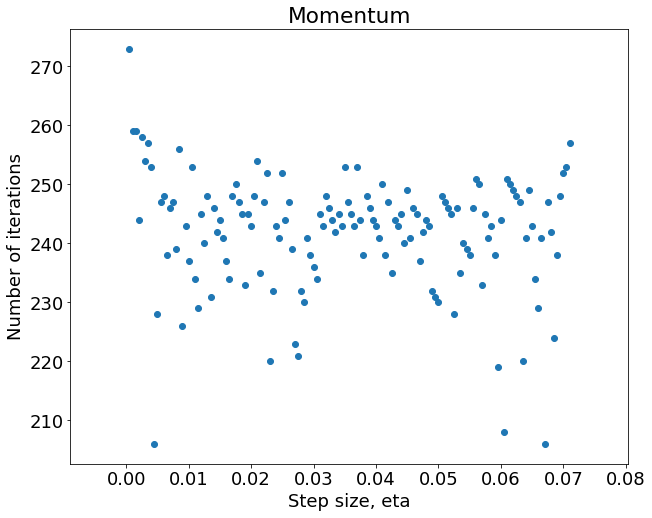

In [222]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("Momentum")

Plot shows that very small step sizes, close to zero, will diverge and similar for eta values greater than about 0.07. Additionally, this plot is quite different than the one for Plain Vanilla, in that the Number of iterations are quite spread out and that a "step" pattern starts to form. More specificall, some consequent points follow a steep slope, then there is a jump where the following points follow a steep slope etc. The jumps could indicate a change in which "minimum" is found.

## Time against Step size

In [0]:
run_time = []
step_size = [] 

for j in range(1,10000):
    r = j/2000
    time_taken = 0
    start_time = time.clock()
    solver.momentum(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha=alpha)
    time_taken = time.clock() - start_time
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    run_time.append(time_taken)  

(0, 0.006)

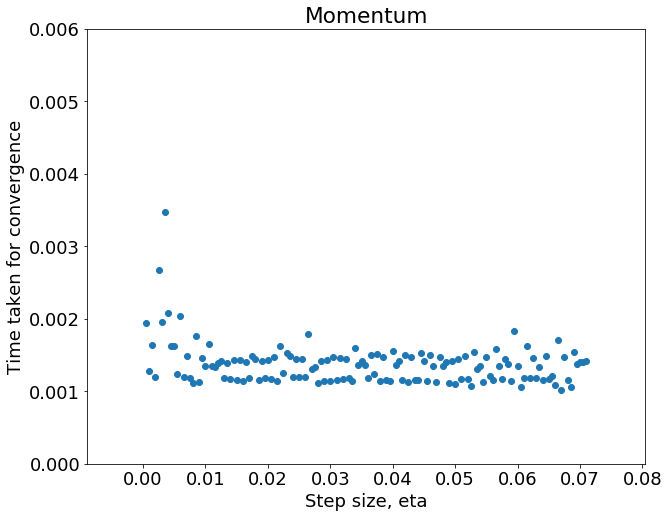

In [226]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')
ax1.set_title('Momentum')
plt.ylim(0,0.006)

Plot of time against step size also shows that eta values close to 0 and bigger than about 0.07 will not converge. "Step" pattern not as evident here.

## Loss path for different Step sizes
In order to show the relative speed of convergence, the following plot was constructed by trying out different step sizes. Step sizes (eta) values of (0.00001, 0.0001, 0.001, 0.01, 0.1) were considered as above. Starting from initial point (0.5, 0.5) displays this plot better.

Did not converge
Converged in 1584 steps.  Loss fn -1.031628453483 achieved by (x1,x2) = (-0.0898407,0.7126563)
Converged in 206 steps.  Loss fn -1.031628453489 achieved by (x1,x2) = (-0.0898418,0.7126567)
Converged in 231 steps.  Loss fn -1.031628453483 achieved by (x1,x2) = (-0.0898408,0.712656)
Converged in 227 steps.  Loss fn -1.031628453489 achieved by (x1,x2) = (-0.0898426,0.7126565)


Text(0, 0.5, 'Loss path')

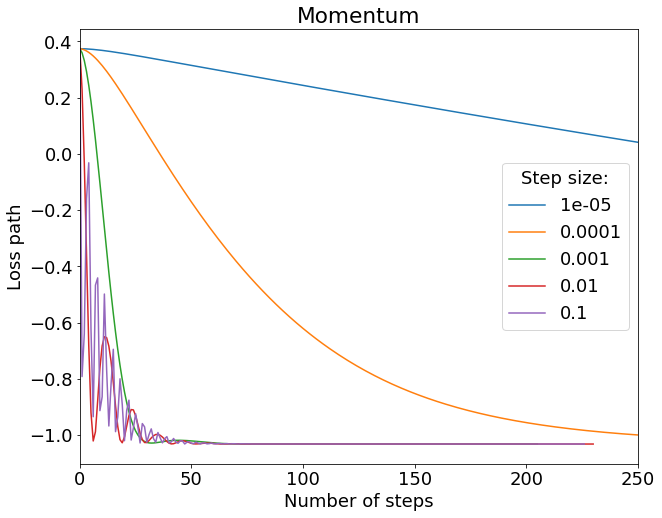

In [234]:
x1_init = 0.5
x2_init = 0.5
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)

for r in eta :
    solver.momentum(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha = alpha)
    x_range = range(len(solver.loss_path))
    ax1.plot(x_range, solver.loss_path)      
plt.xlim((0,250))
plt.title("Momentum")
ax1.legend(eta, title = 'Step size:')
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')

The above plot shows that on the one hand, a very small step size will take a lot of time to reach the solution but at the other hand, a large step size means that a lot of jumps are happening and that Momentum gradient descent gets stuck in a local minimum. Please see README.md file for more detailed investigation.

# ADAM
Use function *adam()* from class to minimize the loss function using ADAM, e.g. with initial points x1_init = x2_init = 1, n_iter = 10,000, eta = 0.1, tol = 1e-5, alpha = 0.90 and beta = 0.99. Please note that the 2 global minima are found at +-(-0.0898,0.7126).



In [289]:
x1_init = 1
x2_init = 1
n_iter = 10000
eta = 0.1
toler = 1e-5
alpha = 0.90
beta = 0.99
solver.adam(x1_init, x2_init, n_iter, eta, tol = toler, alpha = alpha, beta = beta)

Converged in 238 steps.  Loss fn -1.031628453462 achieved by (x1,x2) = (-0.0898402,0.7126576)


##Loss path
Loss path followed is plotted on top of Six-Hump Camel function contour. Starting point is yellow and as iterations progress, points get darker.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


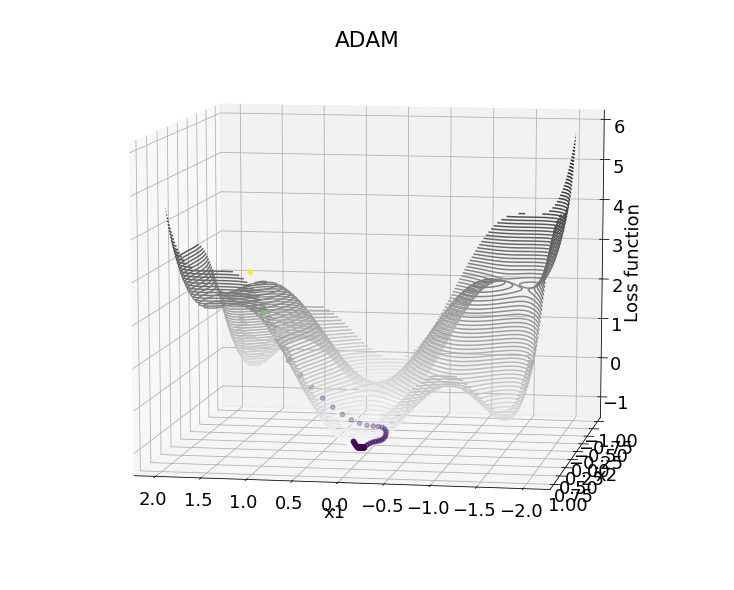

In [237]:
cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax.contour3D(x1, x2, z, 100, cmap='binary')
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Loss function')
ax.set_title('ADAM')
ax.view_init(10,100)

## Number of iterations against Step size

In [0]:
step_size = []
number_of_step = []

for j in range(1,3000):
    r = j/2000
    toler = 1e-5
    solver.adam(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha = alpha, beta = beta)
    step_size.append(r)
    number_of_step.append(solver.num_steps)

Text(0.5, 1.0, 'ADAM')

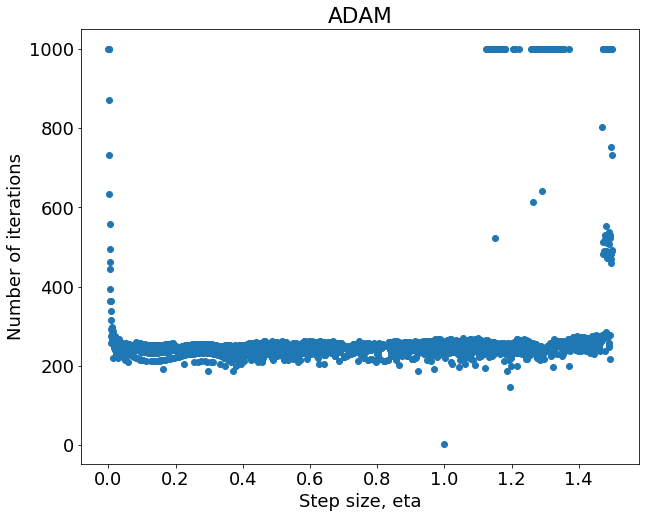

In [311]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("ADAM")

Plot above shows that values close to 0 will need a lot of iterations to reach solution and that values above 1.1 have a higher probability of not converging.

## Time against Step size

In [0]:
run_time = []
step_size = [] 
n_iter = 1000

for j in range(1,1100):
    r = j/100
    time_taken = 0
    start_time = time.clock()
    solver.adam(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha=alpha, beta=beta)
    time_taken = time.clock() - start_time
    #if solver.x1_g > toler or  solver.x2_g > toler :
    #  break
    step_size.append(r)
    run_time.append(time_taken)  

Text(0.5, 1.0, 'ADAM')

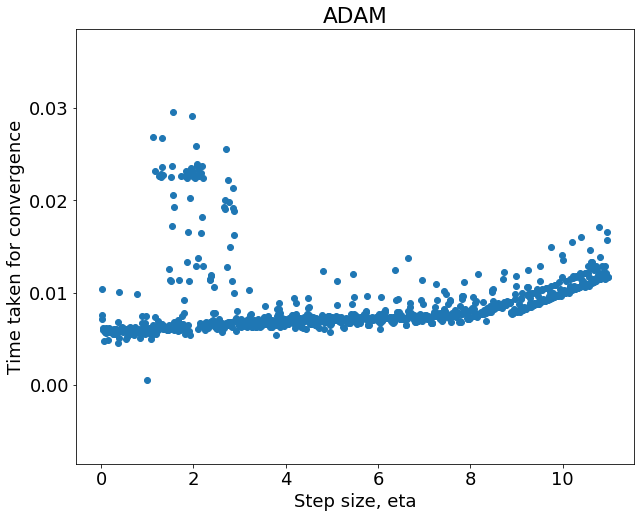

In [309]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')
ax1.set_title('ADAM')

Plot of time against step size also shows that eta values below 10 can converge, with a slower rate as eta increases since there is a slight positive slope. For eta larger than 10, ADAM can still converge, but as the gradient gets steeper, the more time will be required for a solution to be found.

##Loss path for different Step sizes
In order to show the relative speed of convergence, the following plot was constructed by trying out different step sizes. Step sizes (eta) values of (0.00001, 0.0001, 0.001, 0.01, 0.1) were considered as above.

Did not converge
Did not converge
Converged in 1492 steps.  Loss fn -1.031628453488 achieved by (x1,x2) = (-0.0898413,0.7126564)
Converged in 275 steps.  Loss fn -1.031628453484 achieved by (x1,x2) = (-0.0898431,0.712656)
Converged in 238 steps.  Loss fn -1.031628453462 achieved by (x1,x2) = (-0.0898402,0.7126576)


Text(0, 0.5, 'Loss path')

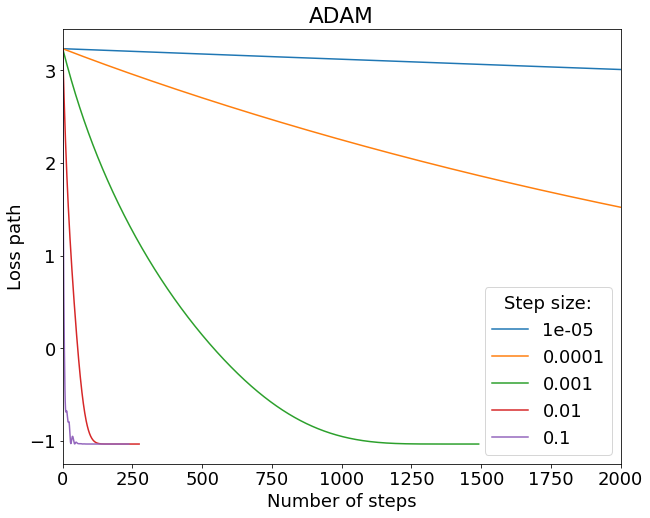

In [243]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]
for r in eta :
    solver.adam(x1_init, x2_init, n_iter, eta = r, tol = toler, alpha = alpha, beta = beta)
    x_range = range(len(solver.loss_path))
    ax1.plot(x_range, solver.loss_path)      
plt.xlim((0,2000))
plt.title("ADAM")
ax1.legend(eta, title = 'Step size:')
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')

Plot shows that very small step sizes might take a lot of time to reach a solution.

# Compare GD methods
A plot comparing the convergence rate for the three different gradient descent methods considered above is shown below. Note that when initial points and parameters vary, the plot might show different results. Interesting plots come up with initial points (1,1), (2,1), (2.5,1), (1,2) and (1.5,1.5) Please refer to README.md file for more information.

## Loss path
Below, a plot showing the path loss followed by each method is displayed. Plain Vanilla is shown in Green, Momentun is shown in blue and ADAM is shown in red.

Converged in 24 steps.  Loss fn -1.031628453489 achieved by (x1,x2) = (-0.0898417,0.7126564)
Converged in 244 steps.  Loss fn -0.215463824381 achieved by (x1,x2) = (-1.7036064,0.7960839)
Converged in 252 steps.  Loss fn 2.104250310324 achieved by (x1,x2) = (1.6071044,0.5686533)


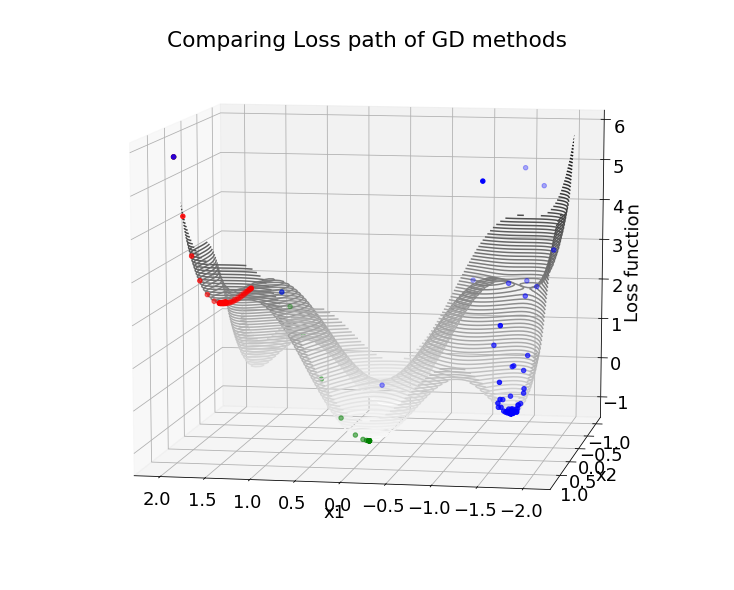

In [260]:
x1_init = 2
x2_init = 1
eta = 0.07
n_iter = 10000

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

# Plot Six-Hump Camel function
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax.contour3D(x1, x2, z, 100, cmap='binary')

# Plot loss path as followed by different methods
solver.find_min(x1_init, x2_init, n_iter, eta, tol = toler)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = 'green')

solver.momentum(x1_init, x2_init, n_iter, eta, tol = toler, alpha = alpha)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = 'blue')

solver.adam(x1_init, x2_init, n_iter, eta, tol = toler, alpha = alpha, beta = beta)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = 'red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Loss function')
ax.set_title('Comparing Loss path of GD methods')
ax.view_init(10,100)

The above 3D plot shows that given the same initial point, the 3 methods follow a different path and reach a different solution. For the given initial points (2,1) and parameters, only Plain Vanilla reaches the global minimum as the other two get stuck in either a local minimum or a saddle point.

## Convergence rate
In order to show the relative speed of convergence, the following plot was constructed using the 3 different GD methods from above..

Converged in 164 steps.  Loss fn 2.104250310318 achieved by (x1,x2) = (1.6071042,0.5686528)
Converged in 212 steps.  Loss fn 2.104250310311 achieved by (x1,x2) = (1.6071046,0.5686515)
Converged in 397 steps.  Loss fn -1.031628453489 achieved by (x1,x2) = (-0.0898419,0.712656)


Text(0, 0.5, 'Loss path')

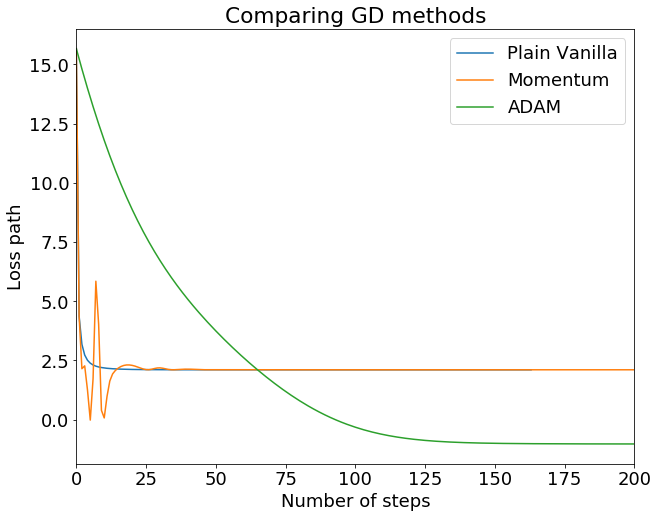

In [257]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)

x1_init = 1.5
x2_init = 1.5
n_iter = 10000
eta = 0.01
toler = 1e-5
alpha = 0.90
beta = 0.99

solver.find_min(x1_init, x2_init, n_iter, eta, tol = toler)
x_range = range(len(solver.loss_path))
ax1.plot(x_range, solver.loss_path)

solver.momentum(x1_init, x2_init, n_iter, eta, tol = toler, alpha = alpha)
x_range = range(len(solver.loss_path))
ax1.plot(x_range, solver.loss_path)

solver.adam(x1_init, x2_init, n_iter, eta, tol = toler, alpha = alpha, beta = beta)
x_range = range(len(solver.loss_path))
ax1.plot(x_range, solver.loss_path)

#solver.rmsprop(x1_init, x2_init, n_iter, eta, tol = toler, beta = beta)
#x_range = range(len(solver.loss_path))
#ax1.plot(x_range, solver.loss_path)


plt.xlim((0,200))
plt.title("Comparing GD methods")
ax1.legend(('Plain Vanilla','Momentum','ADAM'))
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')

The above plot shows that for a given starting point, a gd method might converge to the global minimum faster or slower whereas for other given points, it might get stuck in either a local minimum or on a saddle point without ever reaching the global minimum. This is described in more detail in the README.md file.

# RMSprop

A fourth GD method, RMSprop was also tried out, by using the *RMSprop()* function from the class gd.

In [264]:
x1_init = 2
x2_init = 1
eta = 0.01
beta = 0.8
solver.rmsprop(x1_init, x2_init, n_iter, eta, tol = toler, beta = beta) 

Converged in 71 steps.  Loss fn 2.104250310311 achieved by (x1,x2) = (1.6071047,0.5686515)


## Loss path

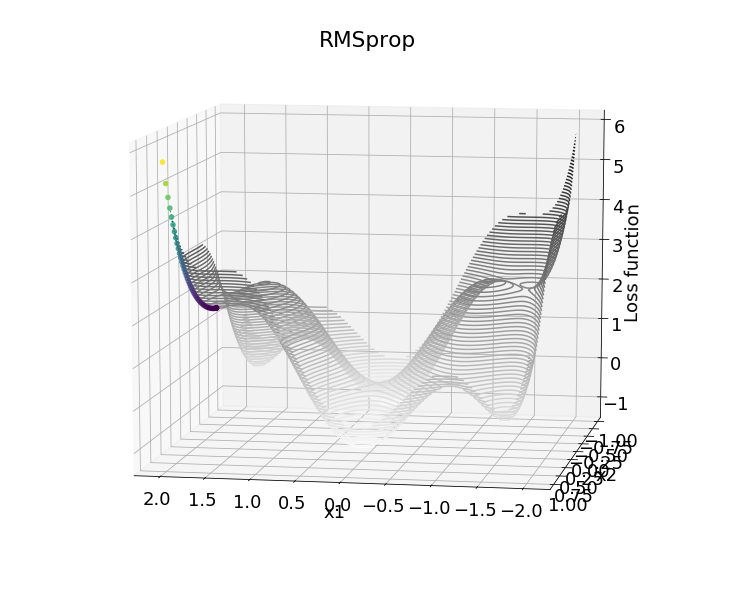

In [266]:
cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
x1 = np.arange(-2, 2, 0.05)
x2 = np.arange(-1, 1, 0.05)
x1, x2 = np.meshgrid(x1, x2)
z = fn_loss(x1, x2)
ax.contour3D(x1, x2, z, 100, cmap='binary')
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Loss function')
ax.set_title('RMSprop')
ax.view_init(10,100)

For the above starting point and parameter, RMSprop gets stuck in a local minimum.

## Number of iterations against Step size

In [0]:
step_size = []
number_of_step = []

for j in range(1,2000):
    r = 0.1 + j/2000
    toler = 1e-5
    solver.rmsprop(x1_init = 1, x2_init = 1, n_iter = 10000, eta = r, tol = toler, beta = 0.8)
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    number_of_step.append(solver.num_steps)

Text(0.5, 1.0, 'Number of iterations against step size')

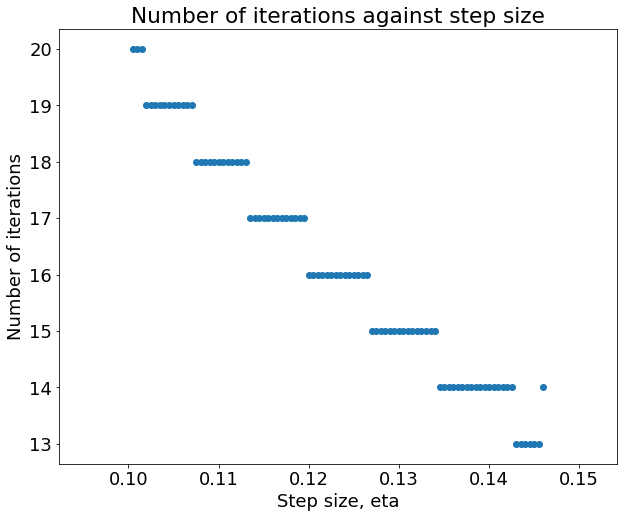

In [268]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("Number of iterations against step size")

It can be seen from the plot, that for the given beta and initial points, an eta value between 0.14 and 0.15 gives the smallest number of steps to reach solution. Furthermore, step sizes more than 0.15 diverge and do not find a solution.

## Time against Step size

In [0]:
run_time = []
step_size = [] 

for j in range(1,1000):
    r = 0.1 + j/2000
    time_taken = 0
    start_time = time.clock()
    solver.rmsprop(x1_init =1, x2_init = 1, n_iter = 10000, eta = r, tol = 1e-5, beta=0.80)
    time_taken = time.clock() - start_time
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    run_time.append(time_taken)  

Text(0.5, 1.0, 'RMSprop')

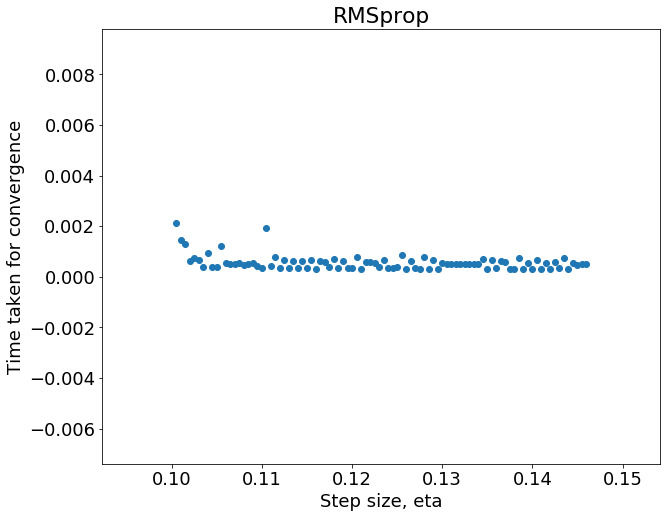

In [273]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')
plt.title('RMSprop')

## Loss path for different Step sizes

Did not converge
Did not converge
Did not converge
Did not converge
Did not converge


Text(0, 0.5, 'Loss path')

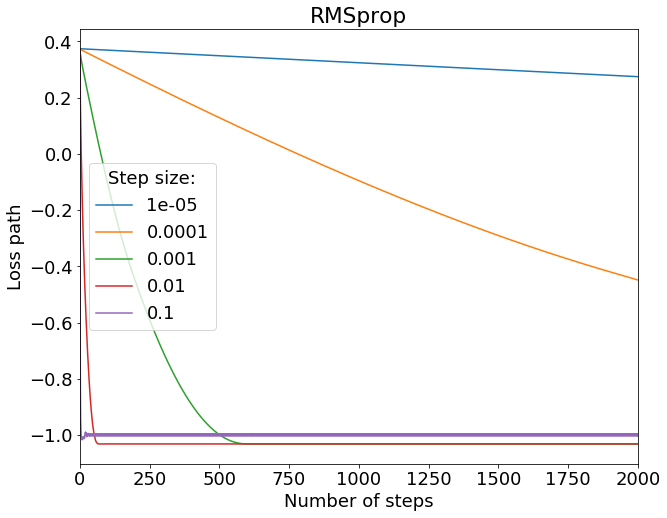

In [274]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]
for r in eta :
    solver.rmsprop(x1_init =0.5, x2_init = 0.5, n_iter = 50000, eta = r, tol = toler,beta = 0.8)
    x_range = range(len(solver.loss_path))
    ax1.plot(x_range, solver.loss_path)      
plt.xlim((0,2000))
plt.title("RMSprop")
ax1.legend(eta, title = 'Step size:')
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')